Regressão Polinomial: É uma forma de de regressão linear. A diferença está
em como ela trata as features (variáveis independentes). Ao invés
de modelar uma relação linear direta
entre a variável independente x e a
variável dependente y (como na regressão linear simples: y = b0 + b1X), a regressão polinomial adiciona termos polinomiais (potências da variável independente) á equação.

No final, construiremos 2 graficos de pontos com o objetivo de comparar a regressão polinomial com a regressão linear

Criação do gráfico ira comparar os valores da predição polinomial com os dados reais da base de dados

In [90]:
# Função que irá construir o gráfico de comparação do modelo
# polinomial. A função irá receber como argumento:
# xpontos: pontos que representam os anos de experiência (variável inde
# pendente/caracteristicas)
# ypontos: pontos que representam a variável alvo (variável dependente que
# queremos prever)
# xlinha: Linha que irá representa os anos de experiência do candidato
# ylinha: linha que representa o salario do candidato
def showplotpolinomial(xpontos, ypontos, xlinha, ylinha):
    
    # Biblioteca que permite a construção e manipulação de gráficos
    import matplotlib.pyplot as plt
    
    # Função que irá construir o gráfico de pontos: ira
    # receber como parametro o xpontos, o ypontos e o 
    # color que definirá a cor dos pontos
    plt.scatter(xpontos, ypontos, color='red')
    
    # Função que  irá criar a linha de previsão
    # do modelo. A função irá receber como parametro
    # o xlinha, o ylinha e o color que define a cor
    # da linha.
    plt.plot(xlinha, ylinha, color='blue')
    
    # Ira definir o titulo do gráfico
    plt.title("Comparando pontos reais com a reta produzida pela regressão polinomial")
    
    # ira definir o rótulo do eixo x
    plt.xlabel("Experiência em anos")
    
    # ira definir o rótulo do eixo y
    plt.ylabel('Salário')
    
    # Ira exibir o gráfico
    plt.show()

Criação do gráfico que irá comparar os valores da predição do modelo de regressão linear com os valores reais

In [ ]:
# Função que irá construir o gráfico de comparação do modelo
# de regressão linear. A função ira receber como  parametro:
# x: experiência em anos (variável independente que queremos
# prever).
# y: variável dependente que queremos prever (salário)
# linearRegressor: Ira representar a classe de regressão
# linear que irá treinar os dados e prever os valores
def showplotlinear(X, y, linearRegressor):
    
    # Biblioteca que permite a construção e manipulação de dados
    import matplotlib.pyplot as plt

    # Função que ira construir o grafico de pontos. A função irá receber
    # como parametro o x, o y e o color que irá definir a cor dos pontos
    # no gráfico
    plt.scatter(X, y, color = 'red')
    
    # Função que irá criar a linha de previsão do modelo. A função
    # ira 
    plt.plot(X, linearRegressor.predict(X), color = 'blue') #plot predicted points in line
    plt.title("Comparando pontos reais com a reta produzida pela regressão linear")
    plt.xlabel("Experiência em anos")
    plt.ylabel("Salário")
    plt.show()

In [92]:
def computarRegressaoPolinomial(x, y, d):
    
    from sklearn.preprocessing import PolynomialFeatures
    
    
    polinomio = PolynomialFeatures(degree=d)
    
    xpolinomio = polinomio.fit_transform(x)
    
    from sklearn.linear_model import LinearRegression
    
    regressoalinearpolinomial = LinearRegression()
    
    regressoalinearpolinomial.fit(xpolinomio, y)
    
    return xpolinomio, regressoalinearpolinomial
    
    
    
    

In [93]:
def computarregressaolinear(x, y):
    
    from sklearn.linear_model import LinearRegression
    
    from sklearn.model_selection import train_test_split
    
    regressao = LinearRegression()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    regressao.fit(x_train, y_train)
    
    return regressao

In [94]:
def progressaopolinomial(nome_arquivo, delimitador = None):
    
    import time
    
    from minhasfuncoes import funcoes
    
    tempo_inicial = time.time()
    
    x, y = funcoes.carregar_Dataset(nome_arquivo, delimitador)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para o carregamento do dataset %.2f"% tempo_percorrido, " segundos")
    
    tempo_inicial = time.time()
    
    regressaoLinear = computarregressaolinear(x, y)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para a construção da regressão linear: %.2f"% tempo_percorrido, " segundos")
    
    tempo_inicial = time.time()
    
    xpoly, polylinear = computarRegressaoPolinomial(x, y, 4)
    
    tempo_percorrido = time.time() - tempo_inicial
    
    print("Tempo necessário para a construção do modelo polinomial: %.2f"% tempo_percorrido, " segundos")
    
    showplotlinear(x, y,regressaoLinear)
    
    showplotpolinomial(x, y,x, polylinear.predict(xpoly))

Tempo necessário para o carregamento do dataset 0.00  segundos
Tempo necessário para a construção da regressão linear: 0.00  segundos
Tempo necessário para a construção do modelo polinomial: 0.00  segundos


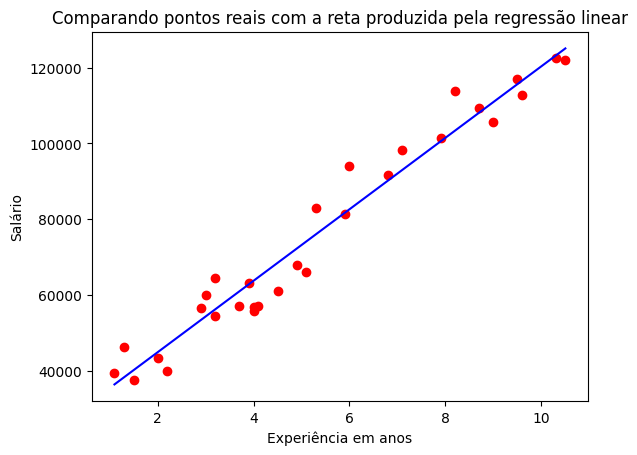

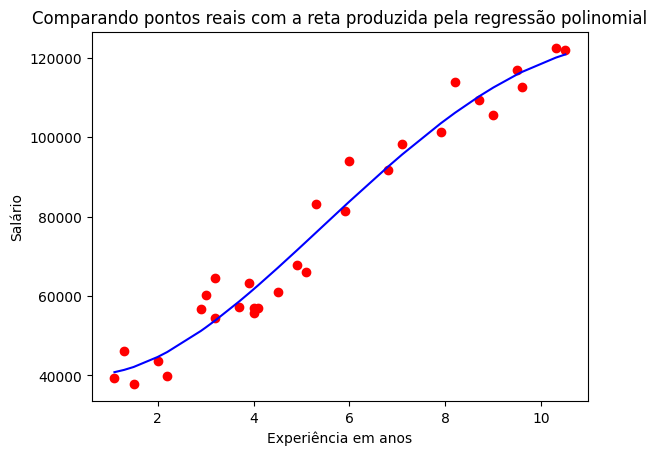

In [95]:
progressaopolinomial('Dados/salary.csv', ";")